## WeatherPy

### Analysis

At this project, we are trying to see the trend between location and temperature, wind speed, cloudiness and humidity.

. by looking at the latitude amnd maximum temperatureplot we saw as cities get closer to equator, temperatur get higher.

. At humidity, when we get closer to the equartor, humidity doesn't get higher or lower .

. In cloudiness, we can't point any relation between latitude and cloudiness as we get closer to the equator. 

. For wind speed, cities that have very diffirent latitudes can have similar wind speeds, and similar latitudes doesn't necessarily have the similar wind speeds.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

In [2]:
from api_keys import api_key
temp_units = "imperial"

In [3]:
from citipy import citipy

In [4]:
output_file = "Output/weather_df.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="
count_one = 0
set_one = 1

In [5]:
lat_lngs = []
cities = []
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

620

In [6]:
dates = []
cloudinesses = []
city_two = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])

        if count_one > 50:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | mayumba
City not found. Skipping...
Processing Record 3 of Set 1 | christchurch
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | busselton
City not found. Skipping...
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | tulsipur
Processing Record 12 of Set 1 | celestun
City not found. Skipping...
Processing Record 13 of Set 1 | chadiza
Processing Record 14 of Set 1 | jiquilpan
Processing Record 15 of Set 1 | berlevag
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | hilo
City not found. Skipping...
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | p

In [7]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [8]:
weather_dataframe = pd.DataFrame(weather_dict)

In [9]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,90,RU,1578337162,94,59.70,30.79,34.00,11.18
1,mayumba,53,GA,1578337163,78,-3.44,10.65,83.05,8.14
2,christchurch,98,NZ,1578337163,54,-43.53,172.64,60.01,23.04
3,nanortalik,0,GL,1578337163,74,60.14,-45.24,12.29,49.37
4,busselton,7,AU,1578337163,27,-33.64,115.35,64.99,10.89


In [10]:
weather_dataframe.to_csv("output_file.csv")

In [11]:
weather_dataframe.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [12]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,90,RU,1578337162,94,59.70,30.79,34.00,11.18
1,mayumba,53,GA,1578337163,78,-3.44,10.65,83.05,8.14
2,christchurch,98,NZ,1578337163,54,-43.53,172.64,60.01,23.04
3,nanortalik,0,GL,1578337163,74,60.14,-45.24,12.29,49.37
4,busselton,7,AU,1578337163,27,-33.64,115.35,64.99,10.89


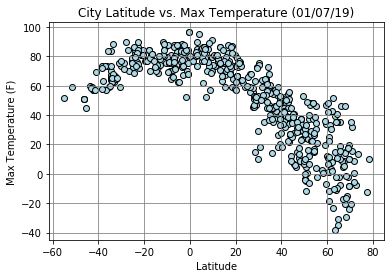

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure1.png")
plt.show()

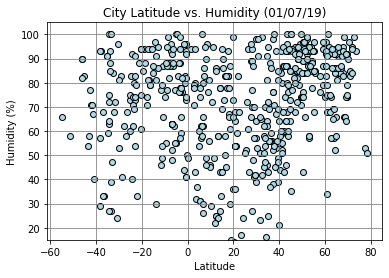

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure2.png")
plt.show()

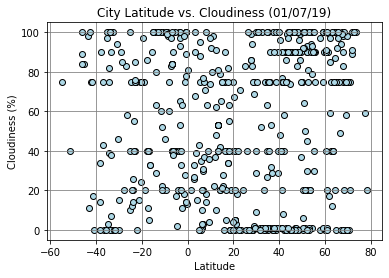

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure3.png")
plt.show()

In [16]:

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

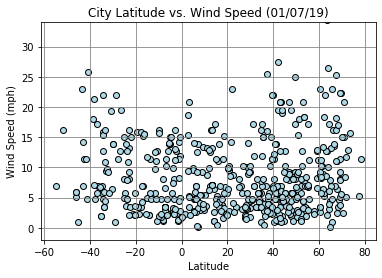

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure4.png")
plt.show()